## Neural Networks

##### Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout

##### Importing dataset

In [3]:
df=pd.read_csv(r"C:\Users\hp\Downloads\gas_turbines.csv")
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


##### EDA

In [4]:
df.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [5]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [6]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [7]:
df.shape

(15039, 11)

##### Visualization

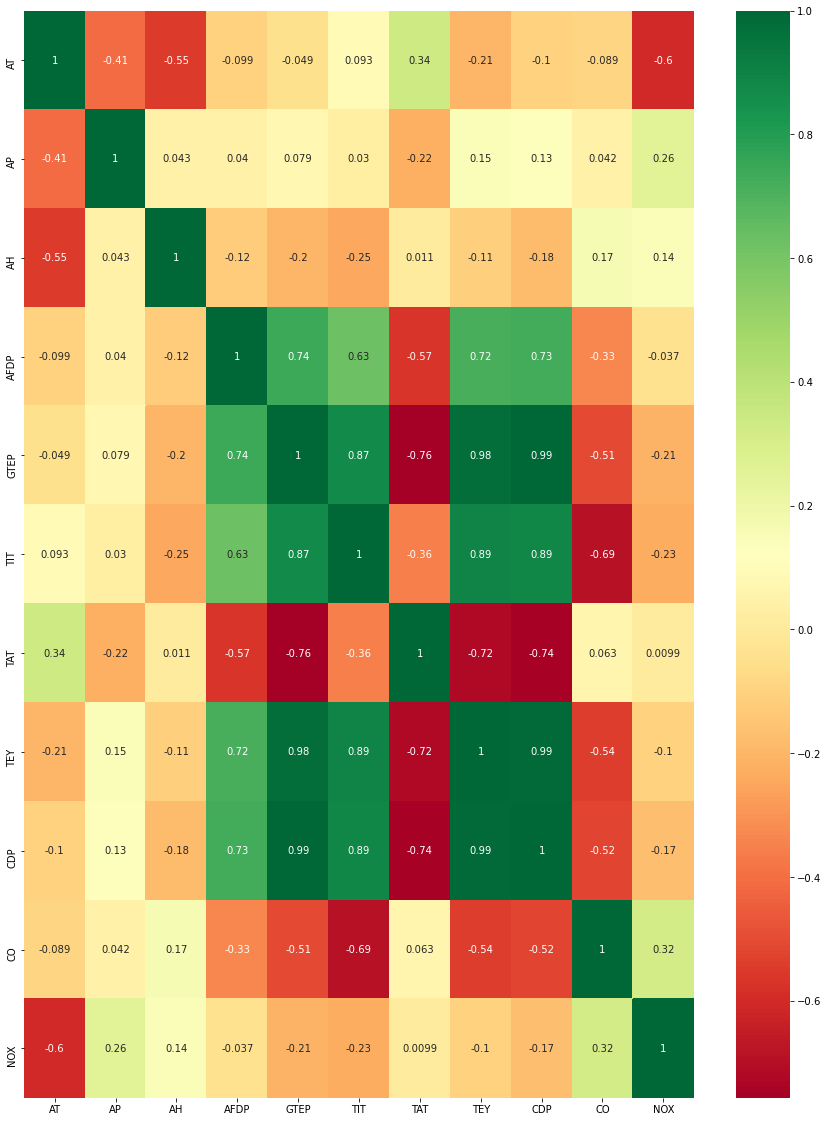

In [8]:
#Visualization:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,20))
#Plot Heat Map
g=sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [9]:
gs=df.values
gs

array([[   6.8594, 1007.9   ,   96.799 , ...,   10.605 ,    3.1547,
          82.722 ],
       [   6.785 , 1008.4   ,   97.118 , ...,   10.598 ,    3.2363,
          82.776 ],
       [   6.8977, 1008.8   ,   95.939 , ...,   10.601 ,    3.2012,
          82.468 ],
       ...,
       [   7.2647, 1006.3   ,   99.496 , ...,   10.483 ,    7.9632,
          90.912 ],
       [   7.006 , 1006.8   ,   99.008 , ...,   10.533 ,    6.2494,
          93.227 ],
       [   6.9279, 1007.2   ,   97.533 , ...,   10.583 ,    4.9816,
          92.498 ]])

##### split into input (X) and output (Y) variables

In [10]:
X=gs[:,[0,1,2,3,4,5,6,8,9,10]]
Y=gs[:,-4]

In [11]:
X

array([[   6.8594, 1007.9   ,   96.799 , ...,   10.605 ,    3.1547,
          82.722 ],
       [   6.785 , 1008.4   ,   97.118 , ...,   10.598 ,    3.2363,
          82.776 ],
       [   6.8977, 1008.8   ,   95.939 , ...,   10.601 ,    3.2012,
          82.468 ],
       ...,
       [   7.2647, 1006.3   ,   99.496 , ...,   10.483 ,    7.9632,
          90.912 ],
       [   7.006 , 1006.8   ,   99.008 , ...,   10.533 ,    6.2494,
          93.227 ],
       [   6.9279, 1007.2   ,   97.533 , ...,   10.583 ,    4.9816,
          92.498 ]])

In [12]:
Y

array([114.7 , 114.72, 114.71, ..., 110.19, 110.74, 111.58])

##### Splitting data into train dataset and test dataset

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=101)

##### Standardization

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [16]:
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_test

array([[0.35890393, 0.40602285, 0.91801706, ..., 0.34107329, 0.03084967,
        0.48475958],
       [0.55162803, 0.59086189, 0.72785444, ..., 0.42819611, 0.02833486,
        0.43366477],
       [0.69430373, 0.53478712, 0.55215014, ..., 0.14847583, 0.15186537,
        0.33822331],
       ...,
       [0.29923532, 0.48494289, 0.94876603, ..., 0.77514199, 0.00101504,
        0.41400706],
       [0.64399376, 0.35825545, 0.50904718, ..., 0.04705791, 0.10100297,
        0.36756316],
       [0.3486443 , 0.24340602, 0.81637941, ..., 0.34416412, 0.00787964,
        0.54170062]])

##### Creating Model

In [17]:
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
# add nodes for prediction
model.add(Dense(1))

In [18]:
model.compile(optimizer='rmsprop',loss='mse')

In [19]:
# Fit the model
model.fit(x_train, y_train, epochs=250)

Epoch 1/250
353/353 [==============================] - 90s 34ms/step - loss: 13614.1299 1s - loss: 1531 - ETA - ETA: 0s - loss: 1388
Epoch 2/250
353/353 [==============================] - ETA: 0s - loss: 376.9457- ETA: 0s - loss: 3 - 13s 38ms/step - loss: 376.4852
Epoch 3/250
353/353 [==============================] - 11s 31ms/step - loss: 29.5914
Epoch 4/250
353/353 [==============================] - 12s 33ms/step - loss: 23.20748s - loss: - ETA: 8s - los - ETA: 0s - loss: 23.
Epoch 5/250
353/353 [==============================] - 11s 31ms/step - loss: 12.6656
Epoch 9/250
353/353 [==============================] - 10s 28ms/step - loss: 10.9543
Epoch 10/250
353/353 [==============================] - 19s 55ms/step - loss: 9.4208
Epoch 11/250
353/353 [==============================] - 16s 45ms/step - loss: 8.0989
Epoch 12/250
353/353 [==============================] - 14s 40ms/step - loss: 6.9188 1s - 
Epoch 13/250
353/353 [==============================] - 3s 9ms/step - loss: 0.8451A: 7

353/353 [==============================] - 6s 18ms/step - loss: 0.8055- ETA: 2s - loss: 0 - ETA: 0s 
Epoch 250/250
353/353 [==============================] - 8s 21ms/step - loss: 0.8143A:  - E - ETA: 5s - lo -


<AxesSubplot:>

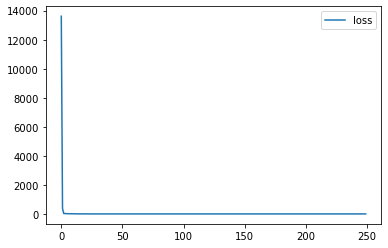

In [20]:
%matplotlib inline
import matplotlib as plot
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

##### Model Prediction

In [21]:
pred = model.predict(x_test)
pred

array([[132.51236 ],
       [133.83617 ],
       [111.044754],
       ...,
       [160.40129 ],
       [104.50866 ],
       [132.84798 ]], dtype=float32)

In [23]:
pred = pred.ravel()

##### Accuracy and Absolute error

In [24]:
test_score = model.evaluate(x_test,y_test,verbose=0)
test_score

0.5237094163894653

In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [26]:
mean_absolute_error(pred,y_test)

0.5287702339659344

In [27]:
mean_squared_error(pred,y_test)

0.5237093546494049

In [28]:
import matplotlib.pyplot as plt

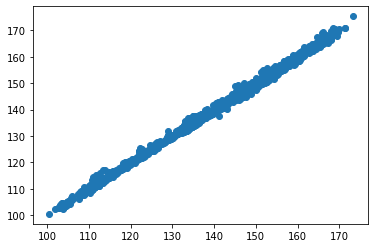

In [29]:
plt.scatter(y_test,pred)